Shape of waveform: torch.Size([1, 170343])
Sample rate: 44100
Shape of magnitude spectrum: torch.Size([1, 513, 333])
Shape of phase spectrum: torch.Size([1, 513, 333])


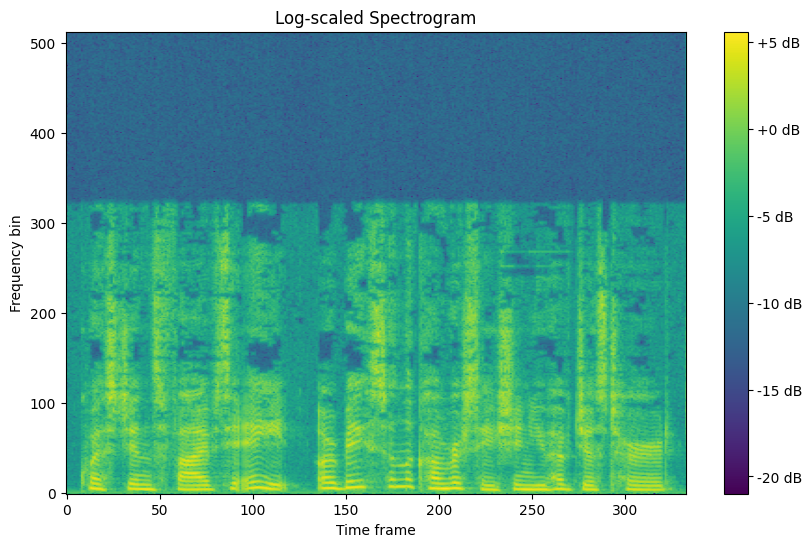

Frequency axis: tensor([   0.0000,   43.0664,   86.1328,  ..., -129.1992,  -86.1328,
         -43.0664])
Time axis: tensor([0.0000, 0.0116, 0.0232, 0.0348, 0.0464, 0.0580, 0.0697, 0.0813, 0.0929,
        0.1045, 0.1161, 0.1277, 0.1393, 0.1509, 0.1625, 0.1741, 0.1858, 0.1974,
        0.2090, 0.2206, 0.2322, 0.2438, 0.2554, 0.2670, 0.2786, 0.2902, 0.3019,
        0.3135, 0.3251, 0.3367, 0.3483, 0.3599, 0.3715, 0.3831, 0.3947, 0.4063,
        0.4180, 0.4296, 0.4412, 0.4528, 0.4644, 0.4760, 0.4876, 0.4992, 0.5108,
        0.5224, 0.5341, 0.5457, 0.5573, 0.5689, 0.5805, 0.5921, 0.6037, 0.6153,
        0.6269, 0.6385, 0.6502, 0.6618, 0.6734, 0.6850, 0.6966, 0.7082, 0.7198,
        0.7314, 0.7430, 0.7546, 0.7663, 0.7779, 0.7895, 0.8011, 0.8127, 0.8243,
        0.8359, 0.8475, 0.8591, 0.8707, 0.8824, 0.8940, 0.9056, 0.9172, 0.9288,
        0.9404, 0.9520, 0.9636, 0.9752, 0.9868, 0.9985, 1.0101, 1.0217, 1.0333,
        1.0449, 1.0565, 1.0681, 1.0797, 1.0913, 1.1029, 1.1146, 1.1262, 1.1378,
    

In [9]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# 加载音频文件
waveform, sample_rate = torchaudio.load('./examples/default.wav')

# 打印音频信息
print(f"Shape of waveform: {waveform.shape}")
print(f"Sample rate: {sample_rate}")
n_fft=1024
hop_length = 512
# 定义STFT变换
stft_transform = torchaudio.transforms.Spectrogram(n_fft=1024, hop_length=512, power=None)

# 应用STFT
stft = stft_transform(waveform)

# 获取幅度谱和相位谱
magnitude = stft.abs()
phase = stft.angle()

# 打印频谱信息
print(f"Shape of magnitude spectrum: {magnitude.shape}")
print(f"Shape of phase spectrum: {phase.shape}")

# 可视化频谱
plt.figure(figsize=(10, 6))
plt.imshow(magnitude.log2()[0,:,:].detach().numpy(), cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-scaled Spectrogram")
plt.xlabel("Time frame")
plt.ylabel("Frequency bin")
plt.show()

# 获取频率和时间轴
frequency_axis = torch.fft.fftfreq(n_fft, 1/sample_rate)
time_axis = torch.arange(0, waveform.size(1) - n_fft, hop_length) / sample_rate

# 获取频谱值
spectrum_values = magnitude.squeeze().detach().numpy()

# 打印频率轴和时间轴信息
print(f"Frequency axis: {frequency_axis}")
print(f"Time axis: {time_axis}")
print(f"Spectrum values shape: {spectrum_values.shape}")

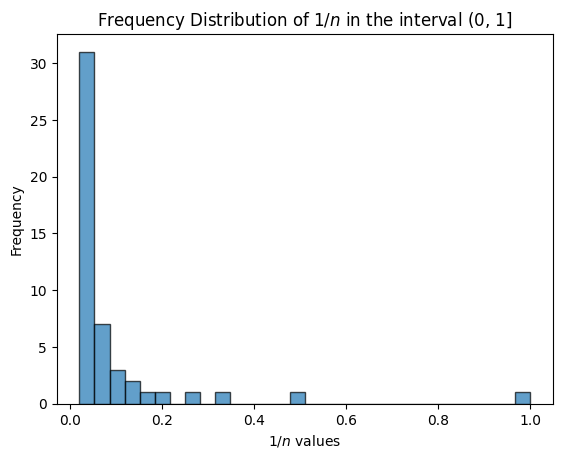

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 n 的值，这里选择 1 到 1000 之间的整数
n_values = np.arange(1, 50)

# 计算 1/n 的值
inv_n_values = 1 / n_values

# 绘制频率分布直方图
plt.hist(inv_n_values, bins=30, edgecolor='black', alpha=0.7)

# 设置标题和标签
plt.title('Frequency Distribution of $1/n$ in the interval (0, 1]')
plt.xlabel('$1/n$ values')
plt.ylabel('Frequency')

# 显示图形
plt.show()


In [24]:
import requests
import base64
import numpy as np
import librosa
import soundfile as sf

# 定义请求的URL
url = "http://172.28.4.42:80/v1/tts"

# 定义请求的数据
request_data = {
    "text": '间弹出一把匕首，蹲下身来，自顾自的切开了魔兽的头颅，然后缓缓的翻找着。好片刻之后，萧炎眉头紧皱了起来，无奈的摇了摇头，将匕首上的鲜血搽干净收好，站起身来，对着那正盯着自己眼睛眨也不眨的众人耸了耸肩：“看来我似乎挺倒霉，什么都没有。”听得萧炎的话，众人这才从震撼中逐渐的回过神来，望着萧炎那一无所获的双手，卡岗也只得惋惜的摇了摇头，然后一挥手，大声喝道：“各位，先帮团长解决另外一头魔兽！”听着卡岗的喝声，众位血战佣兵也赶紧抓起手中的武器，然后涌向费雷的战场，将那头魔兽包围了起来，然后由费雷指挥着，开始对魔兽进行着围杀。手持着重尺，萧炎斜靠着树干，嘴中咬着草根，低头望着自己那被搽破了皮，而不断滴着鲜血的拳头，目光中却是跳动着兴奋，虽然说先前一拳击杀这头二阶魔兽是因为属性相克的缘故，不过紫火的威力，还真的远远超出了萧炎的意料，这要是换做平常，即使是自己使用上了八极崩，也顶多只能伤到二阶魔兽，想要击杀，却依然还是有点不可能。手指在纳戒上轻刨了刨，萧炎从中取出一枚回气丹，然后不着痕迹的塞进嘴中，喉咙滚动了一下，将之吞了下去。“唉，这破功法，如果再不进化，我可连回气丹都吃不起了。”感受着体内逐渐回复的斗气，萧炎无奈的轻声道。在萧炎无聊的斜靠着树干之时，不远处的两道倩影却是缓缓对着他走了过来。“喂，萧炎，你没事吧？”少女娇脆的声音，让得萧炎懒散的抬起头来，目光随意的瞟了一眼苓儿，然后视线在其身旁那位魔鬼身材女子身上停留了一会，便是懒懒的收了回来，对于这位给他留下刁蛮印象的少女，萧炎实在是没有多少理会的心思，所以当下不咸不淡的道：“没事。”被萧炎这般平淡对待，苓儿俏脸略微有些涨红，张着红润小嘴，欲言欲止的模样，可却偏偏说不出半句缓和气氛的话语，想来她也知道上次自己给对方留下了什么印象。“你手掌在流血，需要包扎一下吗？”见到气氛沉闷，那名魔鬼身材女子只得无奈的开口，顿时，清冷的脆声，便是在萧炎耳边响了起来。抬眼望着这名模样颇为不错的女子，萧炎目光在其身上扫视了一转，微微摇头，同样是有些无奈的道：“不用了，真没啥事。”萧炎和先前如出一辙的平淡模样，也是让得晴叶微微一怔，不是她自恋，以她的容貌，还真的很少遇见这般对待，不过她也是心高气傲之人，见到萧炎摇头拒绝，也就不再继续询问，于是，三人间的气氛，再度变得沉闷。沉闷的气氛，持续了半晌之后，终于是被树林中的一阵欢喝声给打破了去，三人抬起头，却是发现，原来那头与费雷苦战的魔兽，已经被众人联手击杀，难怪他们会如此兴奋。将魔兽尸体丢下，吩咐几名佣兵寻找挖取魔核，费雷带着卡岗等人大笑着对着萧炎走过来，豪迈的笑声，将林间的飞鸟都震飞了许多：“哈哈，萧炎小兄弟，久闻其名，可却一直未能有幸亲眼瞧见，今日还真是多谢了。”萧炎微笑着摇了摇头，先是卡岗打了一声招呼，这才对着这位看起来颇为豪爽的壮汉笑道：“我在青山镇能有什么好名声？”“嘿嘿，小小年纪，连穆蛇那狡诈的家伙都栽在了你手中，这名声，可不弱，至少我这血战佣兵团没一人能比得上你。”费雷上下打量了一下萧炎，心中忍不住再次叹息着摇了摇头，看萧炎先前的出手，想来传闻中穆蛇被他击杀的消息应该的确是真的了，真不知道，这家伙是怎么修炼的，不过二十的年龄，怎么就如此变态？随意的笑了笑，萧炎抬头望了眼天色，无奈的道：“抱歉了，那头魔兽体内并没有二阶木系魔核，所以，我只能继续去寻找，恐怕不能陪你们继续聊天了。”说着，萧炎便是将手中的玄重尺背在背上，准备着再次进入森林寻找目标。“十分抱歉，竟然让你白出手了一次，若你不介意的话，取另外一头魔兽的魔晶吧？虽然那是一枚土属性的。”摊了摊手，费雷歉意的道。“算了，我只需要木系的二阶魔核，那东西，你们留着吧。”笑着摆了摆手，萧炎转身对着密林深处走去。“等等。”女子清冷悦耳的声音，忽然从后面传来，让得萧炎止住了脚步，疑惑的转过身来，望着晴叶。“你很需要二阶的木系魔核？”微蹙着柳眉，晴叶问道。“嗯，有点急。”闻言，晴叶略微踌躇了一下，然后伸出玉手将修长脖子之上的挂坠缓缓的取了下来，挂坠的一头，被藏在晴叶的皮衣之内，随着她的轻轻扯动，挂坠被完全的扯了出来，原来在挂坠的尽头，竟然吊着一枚浑圆的绿色冰珠。“这是二阶魔兽葵木兽的魔核，你帮了我们血战佣兵团一次，那便用它做报酬吧。”有些不舍的摸了摸这枚漂亮的魔核，晴叶将它抛向萧炎。习惯性的伸手接住这枚魔核，入手处一片温凉，而且或许是因为长久被藏在女子贴身部位，所以竟然有着淡淡的体香残留。“晴叶…”见到晴叶的举动，一旁的费雷不由得叫了一声，略微沉吟后，只得无奈的道：“既然你自愿，便随你吧，不过这是你的私物，待会回去之后，我们会用别的物品，来补偿你，毕竟，这是团规。”“不用了，若不是他出手帮忙，我们这里恐怕至少会折损一半的同伴。”摇了摇头，晴叶微笑道。“果然是二阶的木系魔核。”略微感应了一下手中魔核内的能量，萧炎也是面露喜意，将魔核不客气的收好，抬头望着晴叶那张精致的俏脸，笑道：“多谢了，不过这是你的东西，我也的确不好让你吃亏，这样吧…”皱着眉头沉吟了一会，萧炎手掌一翻，一个小玉瓶出现在掌心中，然后将之掷向晴叶，朗笑道：“这里面有五枚回气丹，能够让你在危险关头迅速回复斗气，论起价值来，并不逊色于你这二阶魔核，现在将它给你，算是一桩公平的交易吧。”本来心中并未打算接受对方的东西，可当回气丹三字一入耳，晴叶俏脸微微一愣，旋即赶忙伸出手来，小心翼翼的接住玉瓶，打开一看，玉容上满是惊喜：“竟然真的是丹药？”闻言，一旁的费雷等人也是有些动容，在他们这种地方，根本很少见到真正出自炼药师手中的正宗丹药，所以当下见到萧炎居然能拿出五枚回气丹，都是颇感震撼。“这小家伙，果然背景不浅，看这手笔，多半还是一些大家族出来历练的少爷，那穆蛇也还真是够倒霉的。”望着晴叶手中的玉瓶，费雷心中不由得暗道。“各位，多谢了，萧炎尚还有急事，所以便不久待了，告辞！”魔核到手，萧炎也是有些迫不及待的想要回去炼制两种丹药以便吞噬紫火，当下对着费雷等人拱了拱手，脚掌在地面猛的一踏，身形迅速的飞射进了密林之中，最后逐渐的消失在众人视线内。望着那缓缓消失在密林黑暗中的萧炎，费雷忍不住的叹了一口气，苦笑道：“本来还想让萧炎小兄弟加入我们血战佣兵团的，不过看他这大手笔，我实在是没那脸开口。”“走吧，别乱想了，以他的天赋，根本不可能屈居在我们这小小的佣兵团之内，照我猜测，他来魔兽山脉，多半还是历练吧，以他的修炼天赋与心计，外面那广阔的世界，才是他大展手段的舞台，我们…还是安心的当小小佣兵吧，说不定十年二十年后，他再来青山小镇，说不得就是一位大斗师甚至斗灵强者了。”收好玉瓶，晴叶转身淡淡的道。“呵呵，也是。”有些自嘲的摇了摇头，费雷手掌一挥，带着众多属下，大声唱着凯旋的歌，扛着两头魔兽尸体对着青山小镇赶回，虽然他们没有萧炎那种追求力量的天赋，不过，小人物同样有小人物的舒畅生活。钻进了密林，萧炎在急行了一阵之后，方才停下脚步，背间微微一颤，紫云翼缓缓舒展开来，斗气在体内流转几圈，最后灌注进入背后的双翼之中。顿时，萧炎的身体缓缓的漂浮了起来，双翼再次一振，身形便是直接冲破树林的束缚，跃上蔚蓝的天空，在辨别了一下位置之后，展翅对着小山谷的方向急掠而去。在飞行路途中，萧炎吃了三枚回气丹，这才逐渐的看见了那笼罩在浓雾之下的小山谷，当下精神一振，直接穿破浓雾，飞进了小山谷之中，在即将落地之时，萧炎双翼微颤，化为纹身，贴在了肩膀之上。经历了一场大战，再次回到平静的山谷，萧炎忍不住的松了一口气，快步来到谷中的茅屋处，见到了正焦急等待的小医仙，而瞧着萧炎安然无恙的归来，小医仙也同样是落下了心头的石头。与小医仙打了招呼，萧炎又是急匆匆的在山谷中将两种丹药所需要的药材全部采集齐全，而将这些做完之后，他这才抱着药材，跃进了山壁上的山洞之中，准备动手炼制这两种对吞噬紫火至关重要的丹药！',
    "voice_name": "default",
    "language": "zh"
}
import time
import wave
# 发送POST请求
start = time.time()
response = requests.post(url, json=request_data)
import torchaudio
import torch
# 检查响应状态码
if response.status_code == 200:
    # 从响应中提取Base64编码的音频数据
    response_data = response.json()
    data = response_data.get("audio")
    #data = np.frombuffer(base64.b64decode(data), dtype=np.float32)
    with wave.open('output.wav', 'wb') as wav_file:
        wav_file.setnchannels(1)
        wav_file.setsampwidth(2)
        wav_file.setframerate(24000)
        wav_file.writeframes(base64.b64decode(data))
    #torchaudio.save('output.wav', torch.tensor(data).unsqueeze(0), 24000)
else:
    print(f"请求失败，状态码：{response.status_code}")
    print("响应内容：", response.text)
end = time.time()
print(end-start)
# cpu 143个字
# 158
# gpu

3.608940362930298


In [29]:
import requests
import base64
import numpy as np
import librosa
import soundfile as sf

# 定义请求的URL
url = "http://172.28.4.42:80/v1/tts"

# 定义请求的数据
request_data = {
    "text": '在浩瀚的宇宙中，苏弥从未像今夜这般感受到太空的美丽。',
    "voice_name": "zh-m-standard-1",
    "language": "zh"
}
import time
# 发送POST请求
start = time.time()
response = requests.post(url, json=request_data)
import torchaudio
import torch
# 检查响应状态码
if response.status_code == 200:
    # 从响应中提取Base64编码的音频数据
    response_data = response.json()
    data = response_data.get("audio")
    data = np.frombuffer(base64.b64decode(data),dtype = np.int16)
    torchaudio.save('./虫族.wav', torch.tensor(data).unsqueeze(0), 16000)
else:
    print(f"请求失败，状态码：{response.status_code}")
    print("响应内容：", response.text)
end = time.time()
print(end-start)
# cpu 143个字
# 35.231178
# gpu

3.2454164028167725


In [12]:
import asyncio
import websockets
import json
import base64
import numpy as np
import librosa
import torch
import time
import torchaudio
import soundfile as sf
import nest_asyncio
import wave
nest_asyncio.apply()

async def receive_audio_data(uri):
    async with websockets.connect(uri) as websocket:
        # 发送配置消息
        rate = 16000
        bits = 16
        config_message = json.dumps({
            "language": "en",
            "voice_name": "default",
            "sample_rate": rate,
            "channel": 1,
            "format": "pcm",
            "bits": bits
        })
        await websocket.send(config_message)

        # 接收确认消息
        response = await websocket.recv()
        print("Config response:", response)
        start = time.time()
        # 发送文本消息
        text_message = json.dumps({"text": "In this section, you are going to read a passage with ten statements attached to it. Each statement contains information given in one of the paragraphs. Identify the paragraph from which the information is derived. You may choose a paragraph more than once. Each paragraph is marked with a letter Answer the questions by marking the corresponding letter on Answer Sheet 2"})
        await websocket.send(text_message)
        audio_data_list = []
        flag = True
        new = []
        while flag:
            try:
                # 接收数据
                message = await websocket.recv()
                response = json.loads(message)
                seq = response.get("audio_block_seq")
                audio_status = response.get("audio_status")
                base64_audio_data = response.get("data")
                print(seq,audio_status)
                # 解码Base64字符串
                #print(base64_audio_data)
                #audio_data = base64.b64decode(base64_audio_data)
                new.append(base64_audio_data)
                #new.append(np.frombuffer(audio_data,dtype=np.int16))
                if audio_status == 2:
                    print("here break")
                    flag = False
            except websockets.exceptions.ConnectionClosed:
                print("Connection closed")
                break
        print(new)
        result = b''.join([base64.b64decode(_) for _ in new])
        #result = ''.join(new)
        #result = np.concatenate(new)
        #print(result)
        #audio_data = base64.b64decode(result)
        #result = np.frombuffer(audio_data,dtype=np.int16)
        #base64.b64decode(result)
        with wave.open('output.wav', 'wb') as wav_file:
            wav_file.setnchannels(1)
            wav_file.setsampwidth(2)
            wav_file.setframerate(16000)
            wav_file.writeframes(result)
asyncio.get_event_loop().run_until_complete(receive_audio_data("ws://172.28.4.42:80/stream/tts"))

Config response: {"success": true}
0 1


1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 2
here break
['AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA=', 'LgArAEIAJgD0/ysATwAtABcAIQA0ACoANQAgAAsA7P/r/y8AEwDe/7z/3P/K/8f/vf+i/7L/p//B/8L/jv+b/7D/0v+6/4z/uf/N/9z/zP/Y/9H/xv/V//L/9v/s/8b/2/8FABIA+P/j////+/8iAP7/8/8AABEAKwAMAOH/5//9/yUAHAD9//H/7P8UAAoA5v/d/yUABwC8/7b/8/8RAOL/2v/n/+P/zv+n/7X/HwARANT/m/+p/xEANQDo/4j/tf/+/0QAKwD0/+L/EAAwAD4AawBkAJAAigBRAGMAxgC/AOAA4wDDALIAjQAFAW4BPwHJAKYAwgD/AEQBQAHZAI4AswArAfcARwBSAM0AbABlAKIAuP9o/+H/rf9W/1H/4f7I/rH+OP42/lX+//3j/ZX9wfzi/Of92/1Q/Vf9i/3n/Zv+8P4v/wEAgwBXAWMCpwKFA7kFJwh6CLUBBPkJ/hsN/RD3AyX0zPL/Af8PEQ5rADT0n/a4BJ0L4wbkABL+mf64AEEATwDmA1kF/v8y90308/xSBhsE1fr28wL0jvvBAez+Jvl99pH3KPsT/MP5APp4+7D78/uT+rb59fyh/zQAVAHe//39lwCaBDIHfwclBHwCWQWGB74H4gakBLMDIgWPBM4BpAEFA/8BpgCT/0j+Q/7m/ef9+f90/mP6m/oh/

In [3]:
len("In this section, you are going to read a passage with ten statements attached to it. Each statement contains information given in one of the paragraphs. Identify the paragraph from which the information is derived. You may choose a paragraph more than once. Each paragraph is marked with a letter Answer the questions by marking the corresponding letter on Answer Sheet 2")

371

In [ ]:
len('望着身旁倒塌而下的魔兽，萧炎将手中沾满血迹的布巾丢弃，然后翻手间弹出一把匕首，蹲下身来，自顾自的切开了魔兽的头颅，然后缓缓的翻找着。好片刻之后，萧炎眉头紧皱了起来，无奈的摇了摇头，将匕首上的鲜血搽干净收好，站起身来，对着那正盯着自己眼睛眨也不眨的众人耸了耸肩：“看来我似乎挺倒霉，什么都没有。”听得萧炎的话，众人这才从震撼中逐渐的回过神来，望着萧炎那一无所获的双手，卡岗也只得惋惜的摇了摇头，然后一挥手，大声喝道：“各位，先帮团长解决另外一头魔兽！”听着卡岗的喝声，众位血战佣兵也赶紧抓起手中的武器，然后涌向费雷的战场，将那头魔兽包围了起来，然后由费雷指挥着，开始对魔兽进行着围杀。手持着重尺，萧炎斜靠着树干，嘴中咬着草根，低头望着自己那被搽破了皮，而不断滴着鲜血的拳头，目光中却是跳动着兴奋，虽然说先前一拳击杀这头二阶魔兽是因为属性相克的缘故，不过紫火的威力，还真的远远超出了萧炎的意料，这要是换做平常，即使是自己使用上了八极崩，也顶多只能伤到二阶魔兽，想要击杀，却依然还是有点不可能。手指在纳戒上轻刨了刨，萧炎从中取出一枚回气丹，然后不着痕迹的塞进嘴中，喉咙滚动了一下，将之吞了下去。“唉，这破功法，如果再不进化，我可连回气丹都吃不起了。”感受着体内逐渐回复的斗气，萧炎无奈的轻声道。在萧炎无聊的斜靠着树干之时，不远处的两道倩影却是缓缓对着他走了过来。“喂，萧炎，你没事吧？”少女娇脆的声音，让得萧炎懒散的抬起头来，目光随意的瞟了一眼苓儿，然后视线在其身旁那位魔鬼身材女子身上停留了一会，便是懒懒的收了回来，对于这位给他留下刁蛮印象的少女，萧炎实在是没有多少理会的心思，所以当下不咸不淡的道：“没事。”被萧炎这般平淡对待，苓儿俏脸略微有些涨红，张着红润小嘴，欲言欲止的模样，可却偏偏说不出半句缓和气氛的话语，想来她也知道上次自己给对方留下了什么印象。“你手掌在流血，需要包扎一下吗？”见到气氛沉闷，那名魔鬼身材女子只得无奈的开口，顿时，清冷的脆声，便是在萧炎耳边响了起来。抬眼望着这名模样颇为不错的女子，萧炎目光在其身上扫视了一转，微微摇头，同样是有些无奈的道：“不用了，真没啥事。”萧炎和先前如出一辙的平淡模样，也是让得晴叶微微一怔，不是她自恋，以她的容貌，还真的很少遇见这般对待，不过她也是心高气傲之人，见到萧炎摇头拒绝，也就不再继续询问，于是，三人间的气氛，再度变得沉闷。沉闷的气氛，持续了半晌之后，终于是被树林中的一阵欢喝声给打破了去，三人抬起头，却是发现，原来那头与费雷苦战的魔兽，已经被众人联手击杀，难怪他们会如此兴奋。将魔兽尸体丢下，吩咐几名佣兵寻找挖取魔核，费雷带着卡岗等人大笑着对着萧炎走过来，豪迈的笑声，将林间的飞鸟都震飞了许多：“哈哈，萧炎小兄弟，久闻其名，可却一直未能有幸亲眼瞧见，今日还真是多谢了。”萧炎微笑着摇了摇头，先是卡岗打了一声招呼，这才对着这位看起来颇为豪爽的壮汉笑道：“我在青山镇能有什么好名声？”“嘿嘿，小小年纪，连穆蛇那狡诈的家伙都栽在了你手中，这名声，可不弱，至少我这血战佣兵团没一人能比得上你。”费雷上下打量了一下萧炎，心中忍不住再次叹息着摇了摇头，看萧炎先前的出手，想来传闻中穆蛇被他击杀的消息应该的确是真的了，真不知道，这家伙是怎么修炼的，不过二十的年龄，怎么就如此变态？随意的笑了笑，萧炎抬头望了眼天色，无奈的道：“抱歉了，那头魔兽体内并没有二阶木系魔核，所以，我只能继续去寻找，恐怕不能陪你们继续聊天了。”说着，萧炎便是将手中的玄重尺背在背上，准备着再次进入森林寻找目标。“十分抱歉，竟然让你白出手了一次，若你不介意的话，取另外一头魔兽的魔晶吧？虽然那是一枚土属性的。”摊了摊手，费雷歉意的道。“算了，我只需要木系的二阶魔核，那东西，你们留着吧。”笑着摆了摆手，萧炎转身对着密林深处走去。“等等。”女子清冷悦耳的声音，忽然从后面传来，让得萧炎止住了脚步，疑惑的转过身来，望着晴叶。“你很需要二阶的木系魔核？”微蹙着柳眉，晴叶问道。“嗯，有点急。”闻言，晴叶略微踌躇了一下，然后伸出玉手将修长脖子之上的挂坠缓缓的取了下来，挂坠的一头，被藏在晴叶的皮衣之内，随着她的轻轻扯动，挂坠被完全的扯了出来，原来在挂坠的尽头，竟然吊着一枚浑圆的绿色冰珠。“这是二阶魔兽葵木兽的魔核，你帮了我们血战佣兵团一次，那便用它做报酬吧。”有些不舍的摸了摸这枚漂亮的魔核，晴叶将它抛向萧炎。习惯性的伸手接住这枚魔核，入手处一片温凉，而且或许是因为长久被藏在女子贴身部位，所以竟然有着淡淡的体香残留。“晴叶…”见到晴叶的举动，一旁的费雷不由得叫了一声，略微沉吟后，只得无奈的道：“既然你自愿，便随你吧，不过这是你的私物，待会回去之后，我们会用别的物品，来补偿你，毕竟，这是团规。”“不用了，若不是他出手帮忙，我们这里恐怕至少会折损一半的同伴。”摇了摇头，晴叶微笑道。“果然是二阶的木系魔核。”略微感应了一下手中魔核内的能量，萧炎也是面露喜意，将魔核不客气的收好，抬头望着晴叶那张精致的俏脸，笑道：“多谢了，不过这是你的东西，我也的确不好让你吃亏，这样吧…”皱着眉头沉吟了一会，萧炎手掌一翻，一个小玉瓶出现在掌心中，然后将之掷向晴叶，朗笑道：“这里面有五枚回气丹，能够让你在危险关头迅速回复斗气，论起价值来，并不逊色于你这二阶魔核，现在将它给你，算是一桩公平的交易吧。”本来心中并未打算接受对方的东西，可当回气丹三字一入耳，晴叶俏脸微微一愣，旋即赶忙伸出手来，小心翼翼的接住玉瓶，打开一看，玉容上满是惊喜：“竟然真的是丹药？”闻言，一旁的费雷等人也是有些动容，在他们这种地方，根本很少见到真正出自炼药师手中的正宗丹药，所以当下见到萧炎居然能拿出五枚回气丹，都是颇感震撼。“这小家伙，果然背景不浅，看这手笔，多半还是一些大家族出来历练的少爷，那穆蛇也还真是够倒霉的。”望着晴叶手中的玉瓶，费雷心中不由得暗道。“各位，多谢了，萧炎尚还有急事，所以便不久待了，告辞！”魔核到手，萧炎也是有些迫不及待的想要回去炼制两种丹药以便吞噬紫火，当下对着费雷等人拱了拱手，脚掌在地面猛的一踏，身形迅速的飞射进了密林之中，最后逐渐的消失在众人视线内。望着那缓缓消失在密林黑暗中的萧炎，费雷忍不住的叹了一口气，苦笑道：“本来还想让萧炎小兄弟加入我们血战佣兵团的，不过看他这大手笔，我实在是没那脸开口。”“走吧，别乱想了，以他的天赋，根本不可能屈居在我们这小小的佣兵团之内，照我猜测，他来魔兽山脉，多半还是历练吧，以他的修炼天赋与心计，外面那广阔的世界，才是他大展手段的舞台，我们…还是安心的当小小佣兵吧，说不定十年二十年后，他再来青山小镇，说不得就是一位大斗师甚至斗灵强者了。”收好玉瓶，晴叶转身淡淡的道。“呵呵，也是。”有些自嘲的摇了摇头，费雷手掌一挥，带着众多属下，大声唱着凯旋的歌，扛着两头魔兽尸体对着青山小镇赶回，虽然他们没有萧炎那种追求力量的天赋，不过，小人物同样有小人物的舒畅生活。钻进了密林，萧炎在急行了一阵之后，方才停下脚步，背间微微一颤，紫云翼缓缓舒展开来，斗气在体内流转几圈，最后灌注进入背后的双翼之中。顿时，萧炎的身体缓缓的漂浮了起来，双翼再次一振，身形便是直接冲破树林的束缚，跃上蔚蓝的天空，在辨别了一下位置之后，展翅对着小山谷的方向急掠而去。在飞行路途中，萧炎吃了三枚回气丹，这才逐渐的看见了那笼罩在浓雾之下的小山谷，当下精神一振，直接穿破浓雾，飞进了小山谷之中，在即将落地之时，萧炎双翼微颤，化为纹身，贴在了肩膀之上。经历了一场大战，再次回到平静的山谷，萧炎忍不住的松了一口气，快步来到谷中的茅屋处，见到了正焦急等待的小医仙，而瞧着萧炎安然无恙的归来，小医仙也同样是落下了心头的石头。与小医仙打了招呼，萧炎又是急匆匆的在山谷中将两种丹药所需要的药材全部采集齐全，而将这些做完之后，他这才抱着药材，跃进了山壁上的山洞之中，准备动手炼制这两种对吞噬紫火至关重要的丹药！')

In [1]:
len("本书是作家田耳一本深入历史与江湖缝隙的奇书，作者踏访时代模糊不清的残影，揭秘武侠黑书江湖，重现一段前后跨越几十年、令人唏嘘不已的往事。本书也是一本收获自我的成长小说，作者致力描摹大多数普通人的日常生活，着力书写理想与现实的抗衡、矛盾自我的斗争，力图还原生活的本来面目和人性的复杂与丰盈。")

143

In [5]:
"In this section, you are going to read a passage with ten statements attached to it. Each statement contains information given in one of the paragraphs. Identify the paragraph from which the information is derived. You may choose a paragraph more than once. Each paragraph is marked with a letter Answer the questions by marking the corresponding letter on Answer Sheet 2"

2

In [1]:
import requests
import base64
import soundfile as sf
import json

# 读取示例音频文件并编码为Base64
def read_audio_file(file_path):
    with open(file_path, "rb") as audio_file:
        audio_bytes = audio_file.read()
    audio_base64 = base64.b64encode(audio_bytes).decode("utf-8")
    return audio_base64

# 准备请求数据
audio_file_path = "./examples/default.wav"
audio_base64 = read_audio_file(audio_file_path)
voice_name = "test_voice"

# 构建请求数据
request_data = {
    "audios": [{
        "audio_bytes": audio_base64,
        "audio_format": "wav"
    }],
    "voice_name": voice_name
}

# 发送POST请求
url = "http://172.28.4.42:80/internal/v1/voice-clone"
response = requests.post(url, json=request_data)

# 打印响应
print("Status Code:", response.status_code)
print("Response JSON:", response.json())

Status Code: 200
Response JSON: {'voice_name': 'test_voice', 'status': 2}
